In [5]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\test
input\training


In [6]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [7]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [8]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

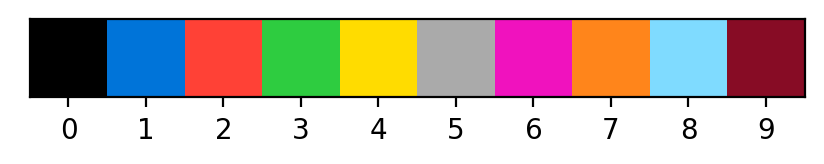

In [9]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [10]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [11]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [12]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [13]:
def Cut(M, r1, r2): #Cut a region into tiles
    List = []
    n = len(M)
    n1 = n//r1
    k = len(M[0])
    k1 = k//r2
    for i in range(r1):
        for j in range(r2):
            R = np.zeros((n1,k1), dtype = int)
            for t1 in range(n1):
                for t2 in range(k1):
                    R[t1,t2] = 0+M[i*n1+t1][j*k1+t2]
            List.append(R.tolist())
    return List

In [14]:
def muti_And(a,b):
    if np.array(a).shape!= np.array(b).shape:
        return -1
    n,m=np.array(a).shape
    a1=Defensive_Copy(a)
    for i in range(n):
        for j in range(m):
            if b[i][j]!=0 and a[i][j]==0:
                a1[i][j]=b[i][j]
    return a1

In [15]:
def h_one_color(A):
    b=[]
    A=np.array(A)
    for i in range(len(A[0])):
        if len(np.unique(A[:,i]))==1:
            b.append(i)
    return b

def w_one_color(A):
    b=[]
    A=np.array(A)
    for i in range(len(A)):
        if len(np.unique(A[i,:]))==1:
            b.append(i)
    return b

In [16]:
import itertools 


In [17]:
for i in list(itertools.permutations([[[0, 5, 5, 5, 5, 0], [5, 5, 0, 5, 5, 5], [5, 5, 0, 5, 0, 0]], [[0, 0, 4, 0, 0, 0], [4, 0, 4, 4, 4, 0], [4, 0, 0, 0, 0, 0]], [[2, 0, 2, 2, 0, 2], [2, 0, 0, 0, 0, 2], [0, 0, 0, 2, 0, 0]], [[0, 8, 0, 8, 0, 0], [0, 8, 0, 0, 0, 0], [0, 8, 0, 8, 0, 0]]],4)):
    print(i[0])
    break

[[0, 5, 5, 5, 5, 0], [5, 5, 0, 5, 5, 5], [5, 5, 0, 5, 0, 0]]


In [18]:
np.math.factorial(4)

24

In [19]:
def solve_add_cut_image(basic_task): 
    #returns -1 if no match is found

    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    same_ratio = True
    R_x = []
    R_y = []
    for x, y in zip(Input,Output):
        n1 = len(x)
        n2 = len(y)
        k1 = len(x[0])
        k2 = len(y[0])
        
        if n1%n2 != 0 or k1%k2 != 0 or n1<n2 or k1<k2 or (n1==n2 and k1==k2):
            same_ratio = False
            break
        else :
            R_y.append(n1//n2)
            R_x.append(k1//k2)
        
    if same_ratio and min(R_x) == max(R_x) and min(R_y) == max(R_y): 
        r1 = min(R_y)
        r2 = min(R_x)
    else:
        return -1
    if r1*r2>6:
        return -1
    
    for i in range(np.math.factorial(r1*r2)):
        solved=True
        for x,y in zip(Input,Output):
            res_img=np.zeros((n2,k2),np.int).tolist()
            cut_image = Cut(x, r1, r2) 
            
            
            for com in (list( itertools.permutations(cut_image,r1*r2)))[i]:
                
                res_img=muti_And(res_img,com)
            
            
            if res_img!=y:
                solved=False
                break
        
        if solved==True:
            res_img=np.zeros((n2,k2),np.int).tolist()
            cut_image = Cut(Test_Case, r1, r2) 
            
            
            for com in (list( itertools.permutations(cut_image,r1*r2)))[i]:
                
                res_img=muti_And(res_img,com)
            return res_img
    return -1
    
                


In [20]:
np.zeros((3,6),np.int).tolist()

[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]

93 0


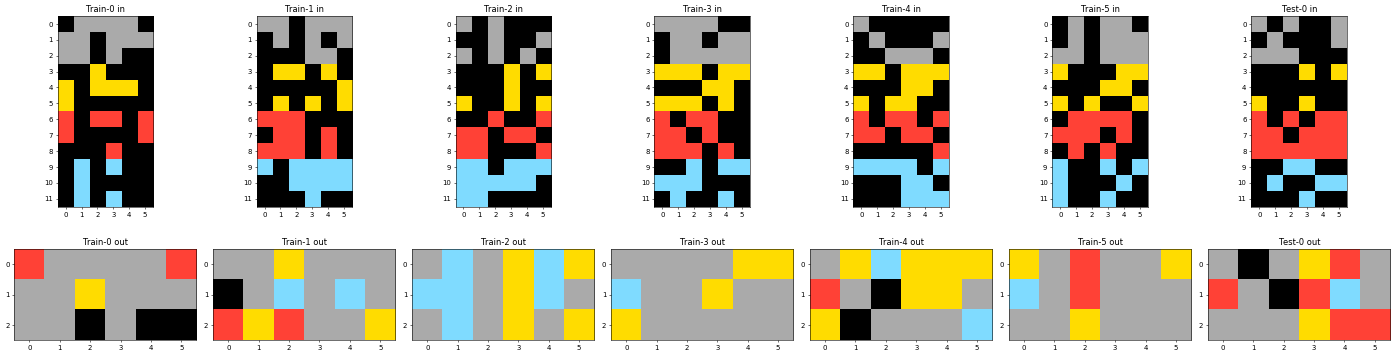

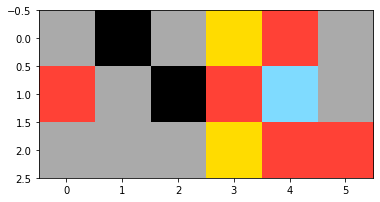

166 0


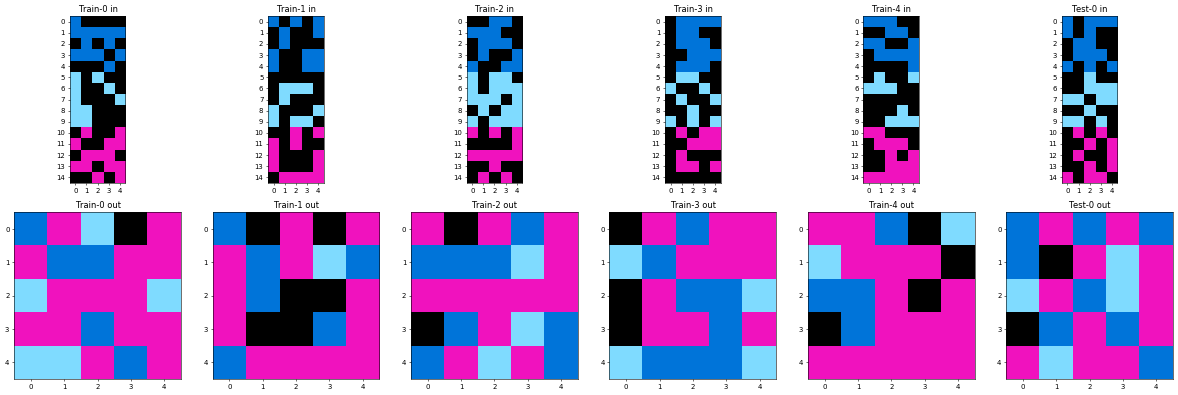

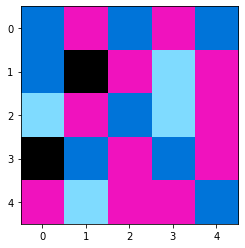

372 0


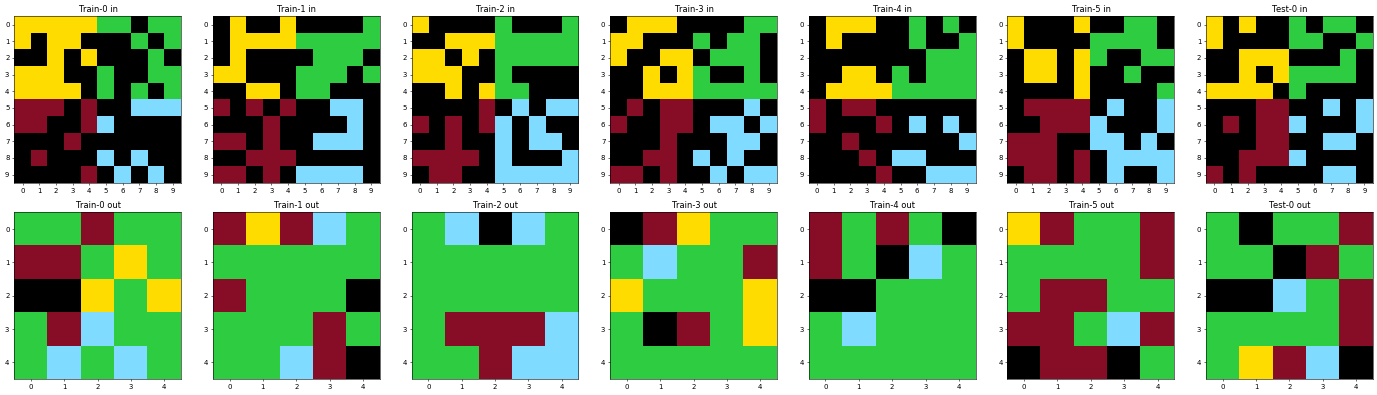

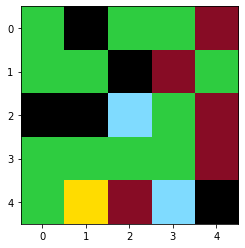

In [21]:
solved_train = []
for i in range(400):
    
    task = Evals[i]
    
    k = len(task['test'])
    for j in range(k):
        
        basic_task = Create(task, j)
        proposed_solution = solve_add_cut_image(basic_task)
        if proposed_solution != -1:
            print(i,j)
            plot_task(task)
            plot_picture(proposed_solution)


In [22]:
a=Trains[256]["train"][1]["input"]
h_one_color(a)

[4]

In [23]:
set([1,4,5])

{1, 4, 5}

In [45]:
def solve_add_cut_image_wall(basic_task): 
    #returns -1 if no match is found

    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    same_ratio = True
    R_x = []
    R_y = []
    new_Input=[]
    for x, y in zip(Input,Output):
        n1 = len(x)
        n2 = len(y)
        k1 = len(x[0])
        k2 = len(y[0])
        
        x_array=np.array(x)
        if n1%(n2+1)!=n2 or k1%(k2+1)!=k2 or (n1==n2 and k1==k2):
            return -1
    
    for x in Input:
        i=1
        j=1
        x_array=np.array(x)
        delete_x=[]
        delete_y=[]
        while n1>i*(n2+1):
            delete_x.append(i*(n2+1)-1)
            i+=1

        while k1>j*(k2+1):
            delete_y.append(j*(k2+1)-1)
            j+=1
        x_array=np.delete(x_array,delete_x,axis=0)
        x_array=np.delete(x_array,delete_y,axis=1)
        new_Input.append(x_array.tolist())
    
    try:
        Test_Case = np.delete(np.array(Test_Case),delete_x,axis=0).tolist()
        Test_Case = np.delete(np.array(Test_Case),delete_y,axis=1).tolist()
    except:
        return -1
    Input = new_Input
    same_ratio = True
    R_x = []
    R_y = []
    for x, y in zip(Input,Output):
        n1 = len(x)
        n2 = len(y)
        k1 = len(x[0])
        k2 = len(y[0])
        
        if n1%n2 != 0 or k1%k2 != 0 or n1<n2 or k1<k2 or (n1==n2 and k1==k2):
            same_ratio = False
            break
        else :
            R_y.append(n1//n2)
            R_x.append(k1//k2)
        
    if same_ratio and min(R_x) == max(R_x) and min(R_y) == max(R_y): 
        r1 = min(R_y)
        r2 = min(R_x)
    else:
        return -1
    if r1*r2>6:
        return -1
    
    for i in range(np.math.factorial(r1*r2)):
        solved=True
        for x,y in zip(Input,Output):
            res_img=np.zeros((n2,k2),np.int).tolist()
            cut_image = Cut(x, r1, r2) 
            
            
            for com in (list( itertools.permutations(cut_image,r1*r2)))[i]:
                
                res_img=muti_And(res_img,com)
            
            
            if res_img!=y:
                solved=False
                break
        
        if solved==True:
            res_img=np.zeros((n2,k2),np.int).tolist()
            cut_image = Cut(Test_Case, r1, r2) 
            
            
            for com in (list( itertools.permutations(cut_image,r1*r2)))[i]:
                
                res_img=muti_And(res_img,com)
            return res_img
    return -1
    
                

        
        
 


68 0


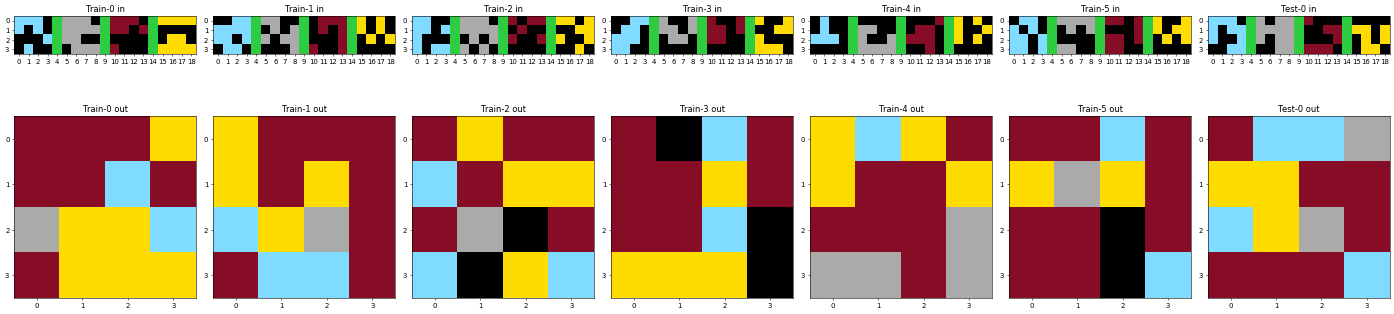

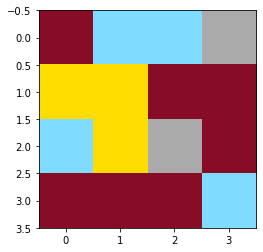

366 0


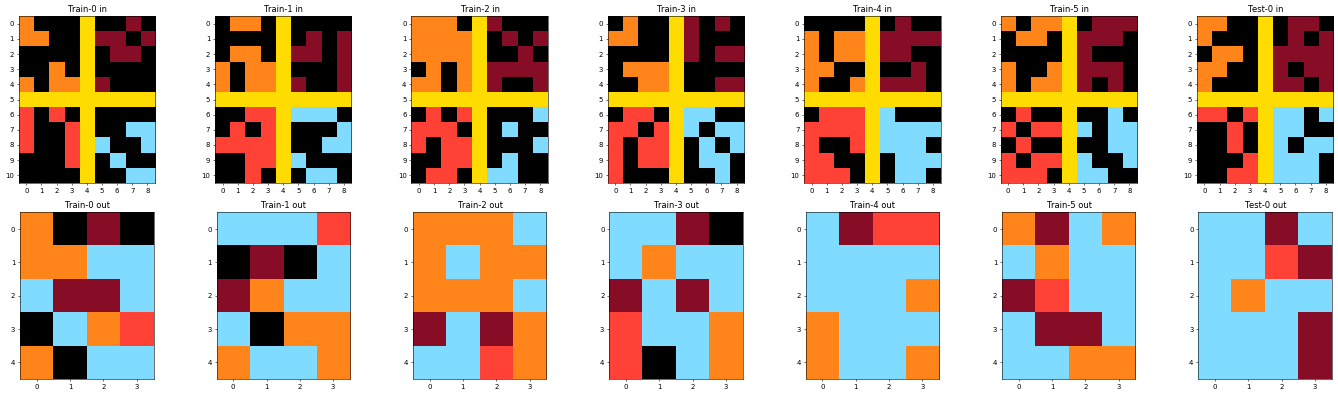

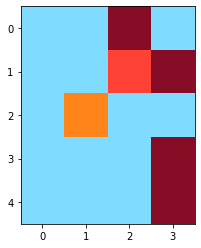

In [49]:
solved_train = []
for i in range(400):
    task = Evals[i]
    
    k = len(task['test'])
    for j in range(k):
        
        basic_task = Create(task, j)
        proposed_solution = solve_add_cut_image_wall(basic_task)
        if proposed_solution != -1:
            print(i,j)
            plot_task(task)
            plot_picture(proposed_solution)